# Testing models

## Packages

In [6]:
import pandas as pd

import statsmodels.api as sm
import statsmodels.formula.api as smf


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

from collections import Counter
import random



import matplotlib.pyplot as plt


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np



## Import Data

In [2]:
df = pd.read_csv('train_df.csv')
df.head()

,age,Pedu,traveltime,studytime,failures,famrel,gooutAlc,health,sex,addressInternet,...,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_reputation,G3
0,1.021751,-0.940091,-0.642435,-1.233786,0.895343,-1.053136,1.570863,1.039751,1,1,...,1,0,0,0,1,0,0,0,0,8
1,0.238078,-0.940091,-0.642435,-0.042232,-0.449374,0.062115,1.570863,0.320484,1,1,...,0,0,0,0,0,0,0,1,0,13
2,0.238078,-0.940091,0.791247,-0.042232,-0.449374,0.062115,0.657033,1.039751,0,1,...,1,0,0,0,0,0,1,0,0,12
3,-0.545595,1.024650,-0.642435,-1.233786,-0.449374,-1.053136,-1.170628,1.039751,1,1,...,0,1,0,0,0,1,1,0,0,0
4,1.805423,-1.922461,-0.642435,-0.042232,0.895343,0.062115,-0.256798,-0.398784,0,1,...,0,0,0,0,0,0,0,0,1,10


In [3]:
X = df.drop(['G3'], axis = 1)
y = df[['G3']]

In [4]:
df_test = pd.read_csv('test_df.csv')
df_test.head()

,age,Pedu,traveltime,studytime,failures,famrel,gooutAlc,health,sex,addressInternet,...,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_reputation,G3
0,-1.329268,1.024650,-0.642435,-0.042232,-0.449374,0.062115,-1.170628,-1.837319,0,1,...,1,0,0,0,1,0,0,0,1,15
1,1.805423,0.042279,-0.642435,-0.042232,0.895343,0.062115,0.657033,-0.398784,1,1,...,0,0,0,0,0,0,0,1,0,13
2,-0.545595,1.024650,-0.642435,-0.042232,-0.449374,0.062115,0.657033,-1.837319,1,1,...,0,0,0,0,0,0,0,0,1,13
3,-1.329268,1.024650,-0.642435,-0.042232,-0.449374,0.062115,-0.256798,1.039751,0,1,...,0,0,0,0,0,0,0,0,0,13
4,0.238078,-1.922461,-0.642435,-0.042232,-0.449374,1.177367,-0.256798,-0.398784,0,1,...,0,0,0,0,0,0,1,0,0,6


In [5]:
X_test = df_test.drop(['G3'], axis = 1)
y_test = df_test[['G3']]

In [8]:
features = ['Pedu', 'studytime', 'failures', 'gooutAlc', 'sex', 'addressInternet', 'famsize', 'schoolsup', 'higher', 'romantic', 'Mjob_health', 'Mjob_services', 'Mjob_teacher']

In [10]:
model = Ridge(alpha=100)

mse = cross_val_score(model, X[features], y, cv=8, scoring='neg_mean_squared_error')
r2 = cross_val_score(model, X[features], y, cv=8, scoring='r2')

print(f"Ridge Regression {100}: \tMSE: {mse.mean()} \tR2: {r2.mean()}")

Ridge Regression 100: 	MSE: -18.170688526420857 	R2: 0.1329238322335178


Mean Squared Error: 14.729727499729474
Mean Absolute Error: 2.749137346029521
R² Score: 0.1472646623115541


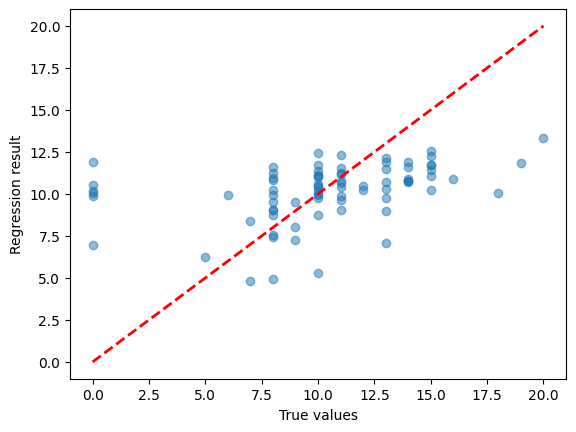

In [19]:


model.fit(X[features], y)

y_pred = model.predict(X_test[features])


y_true = y_test.values.ravel()

# ... Codice per addestrare i modelli e ottenere le predizioni ...

# Calcola le metriche di valutazione
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Stampa le metriche
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')

# Plotta il grafico di confronto tra valori reali e predetti
plt.scatter(y_true, y_pred, alpha=0.5)
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], '--', color='red', linewidth=2)  # Linea identità
plt.xlabel('True values')
plt.ylabel('Regression result')
plt.show()

In [18]:
y_pred

array([[12.28481501],
       [ 9.008301  ],
       [11.89203908],
       [12.15177716],
       [ 9.95302076],
       [ 6.22285864],
       [11.06844869],
       [10.01996244],
       [ 9.62180547],
       [ 7.45228582],
       [10.811186  ],
       [10.41743101],
       [11.16670013],
       [10.07534353],
       [10.0667719 ],
       [ 8.75594279],
       [ 7.28689875],
       [ 8.02525954],
       [10.25157776],
       [12.53014556],
       [10.69896532],
       [10.23414348],
       [ 9.86321861],
       [10.70470946],
       [ 6.9488786 ],
       [ 9.54260474],
       [ 9.04794272],
       [ 7.06979613],
       [10.88219836],
       [11.15146734],
       [12.31237982],
       [10.15707261],
       [ 9.8637027 ],
       [12.46066366],
       [10.78136998],
       [ 4.92425658],
       [ 9.02953016],
       [ 9.5269182 ],
       [ 7.58269876],
       [11.60496037],
       [11.69207048],
       [10.93680887],
       [11.88907628],
       [10.66702733],
       [10.16963929],
       [ 9

In [12]:
y_test

,G3
0,15
1,13
2,13
3,13
4,6
...,...
73,14
74,14
75,11
76,10
